# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [3]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
from scipy import stats
import statsmodels.formula.api as smf

%pylab inline

#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV


#import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib



C:\Users\usuario\Anaconda3\envs\Python2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [4]:
#Reading 1st data file
df1=pd.read_csv("https://s3.amazonaws.com/tripdata/201610-citibike-tripdata.zip")  #October 2016

In [5]:
#Reading 2nd data file
df2=pd.read_csv("https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip")  #July 2017

In [9]:
#Before a merge, the column names must have the same name
df1.columns = df2.columns
df=pd.concat([df1,df2])

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [10]:
#creating a new column "date" with the datetime format
df['date'] = pd.to_datetime(df['starttime'])

In [11]:
#we drop all of the columns except tripduration and date
df=df[["tripduration","date"]]

df.head()

,tripduration,date
0,328,2016-10-01 00:00:07
1,398,2016-10-01 00:00:11
2,430,2016-10-01 00:00:14
3,351,2016-10-01 00:00:21
4,2693,2016-10-01 00:00:21


In [12]:
#creating column "day" with new variable 1=day and 0=night
df.loc[(df["date"].dt.hour > 6) & (df["date"].dt.hour < 19), 'day'] = 1 #this is day
df.loc[(df["date"].dt.hour <= 6) | (df["date"].dt.hour >= 19), 'day'] = 0 #this is night

# Hypothesis Testing
### 1) Trip duration of bikers that ride during the day vs night


The following hypothesis will be tested with different statistical tests:


**H0: there is no statistical difference in the trip duration of trips during the day and  trips during the night**

**The statistical tests that follow will be assessed with $\alpha =0.5$ ** 

In [13]:
#This is to have a smaller sample, 200 hundred times smaller
df_sample=df.sample(n=len(df)/200)

print "The original size is:",len(df)
print "The sample size is:",len(df_sample)

The original size is: 3309471
The sample size is: 16547


In [14]:
#This is Kolmogorov Smirnoff for comparing tripduration acrross day and night

df_day=df[(df["day"] == 1)]
df_night=df[(df["day"] == 0)]

scipy.stats.ks_2samp(df_day["tripduration"],df_night["tripduration"])

Ks_2sampResult(statistic=0.041723261256729205, pvalue=0.0)

In [15]:
#This is Kolmogorov Smirnoff for comparing tripduration across day and night BUT FOR A SAMPLE

df_sample_day=df_sample[(df_sample["day"] == 1)]
df_sample_night=df_sample[(df_sample["day"] == 0)]

scipy.stats.ks_2samp(df_sample_day["tripduration"],df_sample_night["tripduration"])

Ks_2sampResult(statistic=0.051012025728026211, pvalue=3.6098264123886979e-07)

The ** Kolmogorov Smirnoff ** test compares the cumulative distribution of two samples.
In this case, the two samples being compared are the tripduration for the day and the tripduration for the night. 

The p value ** for the entire dataset ** is below 0.05, so this means the two samples have different cumulative distribution and are significantly different in the trip duration.

The p value ** for the subsample ** is below 0.05, but is not as extreme as for the full dataset. The Null Hypothesis is also rejected.

# Spearman Test

In [16]:
#This is Spearman R for comparing tripduration acrross day and night

scipy.stats.spearmanr(df["tripduration"],df["day"])

SpearmanrResult(correlation=0.044085150045427894, pvalue=0.0)

The p value for the Spearman is below 0.05, so this means the Null Hypothesis is rejected.

# Pearson Test
Since the Pearson test requieres the two samples to be the same size and sorted, first we check the size of day and night:

In [17]:
print "The day size is:", len(df_day['tripduration'])
print "The night size is:",len(df_night['tripduration'])

The day size is: 2535471
The night size is: 774000


In [20]:
#sorting and sampling day toa smaller size
df_day_pear=df_day.sample(n=774000).sort_values('tripduration')
df_night_pear=df_night.sort_values('tripduration')

In [21]:
print "The day size is:", len(df_day_pear['tripduration'])
print "The night size is:",len(df_night_pear['tripduration'])


The day size is: 774000
The night size is: 774000


In [22]:
#This is Pearson R for comparing tripduration acrros day and night
scipy.stats.pearsonr(df_day_pear['tripduration'],df_night_pear['tripduration'])

#Returns:(Pearson’s correlation coefficient, 2-tailed p-value)

(0.89381697131322213, 0.0)

The p value for the Spearman is below 0.05, so this means the Null Hypothesis is rejected.

### Below this point, I could't get it done, so just ignore it.

### 2) Age of bikers for trips originating in Manhattan and in Brooklyn

**H0: there is no statistical difference in the age distribution of Manhattan and Brooklyn riders**

In [57]:
df1.columns = df2.columns
df=pd.concat([df1,df2])

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1


In [61]:
#df is the dataframe where the content of the csv file is stored
df['age'] = 2017 - df['birth year']

# dropping NaN values
df['age'].dropna(inplace= True)

In [106]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,loc
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1,25.0,"40.71286844, -73.95698119"
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2,29.0,"40.77801203, -73.95407149"
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1,52.0,"40.73649403, -73.99704374"
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1,24.0,"40.7941654, -73.974124"
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1,26.0,"40.740983, -74.001702"


In [113]:
df_short=df=df[["start station latitude","start station longitude"]]
#

In [104]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.reverse("40.735806, -73.985437")
print(location)

157, East 18th Street, Manhattan Community Board 6, New York County, NYC, New York, 10003, United States of America


In [87]:
df["loc"] = df["start station latitude"].astype(str)+","+" "+df["start station longitude"].astype(str)

In [91]:
df_l_s=df.sample(n=2000)

In [93]:
df_l_s.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,loc
1710495,1888,2017-07-31 17:28:36,2017-07-31 18:00:04,3256,Pier 40 - Hudson River Park,40.727714,-74.011296,3166,Riverside Dr & W 72 St,40.780578,-73.985624,15330,Subscriber,1965.0,2,52.0,"40.7277140778, -74.0112957358"
1732882,542,2017-07-31 21:50:18,2017-07-31 21:59:20,399,Lafayette Ave & St James Pl,40.688515,-73.964763,390,Duffield St & Willoughby St,40.692216,-73.984284,29786,Subscriber,1980.0,1,37.0,"40.68851534, -73.9647628"
431765,260,2016-10-09 02:27:47,2016-10-09 02:32:08,335,Washington Pl & Broadway,40.729039,-73.994046,257,Lispenard St & Broadway,40.719392,-74.002472,23296,Subscriber,1994.0,1,23.0,"40.72903917, -73.99404649"
661987,1925,2017-07-13 12:02:40,2017-07-13 12:34:46,3236,W 42 St & Dyer Ave,40.758985,-73.993800,363,West Thames St,40.708347,-74.017134,21423,Subscriber,1979.0,1,38.0,"40.758984814, -73.9937996864"
682624,958,2016-10-14 00:28:00,2016-10-14 00:43:58,305,E 58 St & 3 Ave,40.760958,-73.967245,511,E 14 St & Avenue B,40.729387,-73.977724,19175,Subscriber,1987.0,1,30.0,"40.76095756, -73.96724467"


In [102]:
#geolocator = Nominatim()
#location = geolocator.reverse(df_sample["loc"].values[0])

    
df_l_s["loc"][:1]

1710495    40.7277140778, -74.0112957358
Name: loc, dtype: object

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

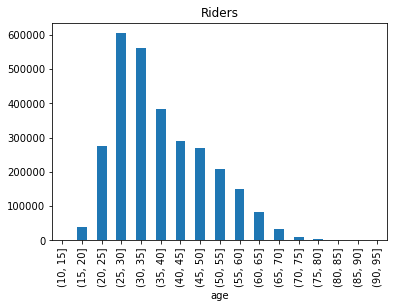

In [66]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Riders");



**Figure 1: histogrammed distribution of riders' ages  **

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


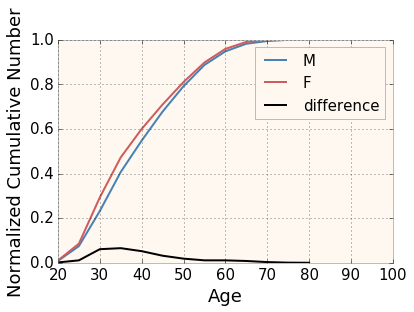

In [11]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [12]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [14]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
#print (ks)

**  FILL IN THE CELL BELOW!**

In [15]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function





The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

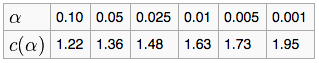

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS


# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [18]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis



# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [19]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis



** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**